## Coding activity 4: Leave one out cross validation

In [3]:
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
from matplotlib import pyplot as plt

def r(x): return 0.5*x*np.cos(4*np.pi*x)
def make_y(x): return r(x) + 0.1*np.random.normal(size=len(x))

np.random.seed(666)

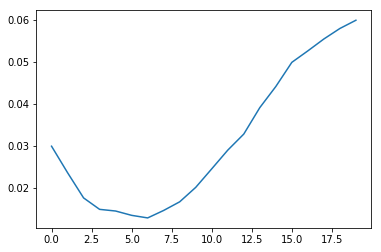

In [42]:
n = 50
k = 4
X = np.random.uniform(size=n)
y = make_y(X)

scores = []
for k in range(1, 21):
    R = KNeighborsRegressor(n_neighbors=k)
    scores.append(cross_val_score(R, X.reshape(-1, 1), y, scoring='neg_mean_squared_error', cv=50))
scores = np.array(scores)

np.mean(scores, axis=1)

plt.plot(-np.mean(scores, axis=1))

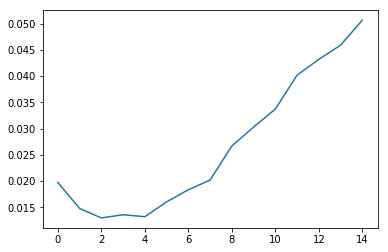

In [61]:
scores = []
for h in np.arange(0.06, 0.2, 0.01):
    R = RadiusNeighborsRegressor(radius=h)
    scores.append(cross_val_score(R, X.reshape(-1, 1), y, scoring='neg_mean_squared_error', cv=50))
scores = np.array(scores)

np.mean(scores, axis=1)

plt.plot(-np.mean(scores, axis=1))